### Week 5 Notebook - Code Along

Peak Detection

In [8]:
# sinusoids in frequency model - consider sinusoid is spectral peek

# use function from theory lectures to get spectral peaks

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import get_window
import sys,os

# go to models
#sys.path.append(os.path.join(os.path.dirname(os.path.realpath(__file__)),'../software/models/'))
sys.path[0] = '/Users/MStamp/Documents/2021 Learning/Audio Processing for Music Applications/sms-tools-master/software/models/'
sys.path
import dftModel as DFT
import utilFunctions as UF

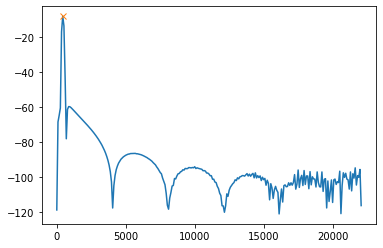

In [19]:
# get simple sine wace
(fs,x) = UF.wavread('/Users/MStamp/Documents/2021 Learning/Audio Processing for Music Applications/sms-tools-master/sounds/sine-440.wav')

M = 501
N = 512
t = -20 # threshold for peak detection

w = get_window('hamming', M)

# get middle of file to have M samples
x1 = x[int(.8*fs):int(.8*fs+M)] # unsure of how this works

mX, pX = DFT.dftAnal(x1, w, N)

# peak detection in utility functions
# input - magnitude (array in db) and threshold 
# setup - 3 conditions - dicard initial and last value - where above threshold
# higher than previous (2) and next values (3)
# combine together to get final locations

ploc = UF.peakDetection(mX, t)

pmag = mX[ploc] # 

# says N / 2 + 1
freqaxis = fs*np.arange(N/2 + 1)/float(N)

plt.plot(freqaxis, mX) # plot spectrum
plt.plot(fs * ploc / float(N), pmag, marker = 'x', linestyle = '')
plt.show()

# can see peak of sinusoid - along with higher values

# quite after from 440 when zoomed in - due to FFT size being 512 
# if not enough samples then quite a distance

In [20]:
fs / N # 86 - distance in hs between 1 sample and another

86.1328125

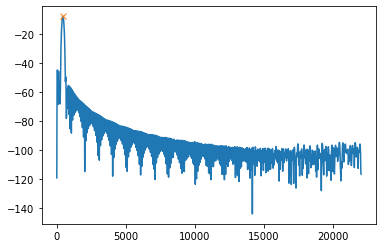

In [21]:
# apply again with FFT increase
N = 2048
mX, pX = DFT.dftAnal(x1, w, N)
ploc = UF.peakDetection(mX, t)

pmag = mX[ploc] # 

# says N / 2 + 1
freqaxis = fs*np.arange(N/2 + 1)/float(N)

plt.plot(freqaxis, mX) # plot spectrum
plt.plot(fs * ploc / float(N), pmag, marker = 'x', linestyle = '')
plt.show()

# more samples - see when zoomed in that around 430-440 hz 
# reduction in distance between samples

In [22]:
44100 / 2048 # still signifciant difference

21.533203125

In [23]:
# apply parabolic interpolation

# function computes interpolated values from 3 highest peaks of local maxima
# finds tip - then location to look into phase spectrum and linear interpolate
# requires magnitdue, phase and input

iploc, ipmag, ipphase = UF.peakInterp(mX, pX, ploc)



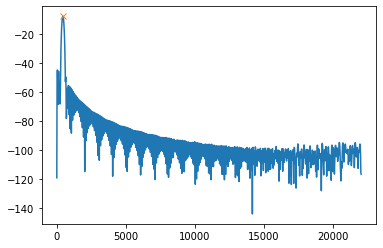

In [25]:
# when plotting
plt.plot(freqaxis, mX)
plt.plot(fs * iploc / float(N), ipmag, marker = 'x', linestyle = '')
plt.show()

# if zoom in - can see shift around from plotted line and will be clsoer
# can see above the magnitdue values on the mag spectrum line

Sinusoidal Analysis

In [28]:
# synthesise main lobes with B-H window - get sum of lobes to reproduce

import numpy as np

bins = np.array([-4,-3,-2,-1,0,1,2,3])

# get lobe from bins

# generates window in spectral domain
# iterate over 4 sinc functions and sums together with coefficeint from BH

X = UF.genBhLobe(bins)
X # only main lobe

/Users/MStamp/Documents/2021 Learning/Audio Processing for Music Applications/sms-tools-master/software/models/utilFunctions.py:135: RuntimeWarning: invalid value encountered in true_divide
  y = np.sin(N * x/2) / np.sin(x/2)                  # compute the sinc function


array([-6.50095043e-21,  1.62787456e-02,  1.96905923e-01,  6.80543554e-01,
        1.00000000e+00,  6.80543554e-01,  1.96905923e-01,  1.62787456e-02])

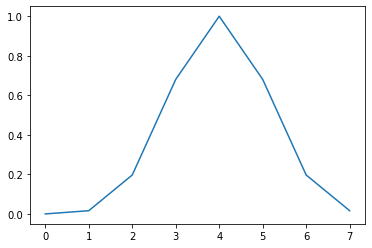

In [29]:
plt.plot(X)

/Users/MStamp/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


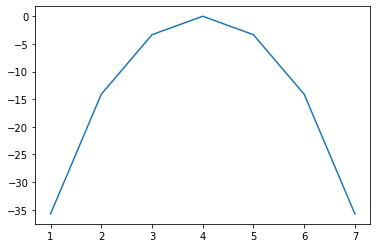

In [31]:
plt.plot(20*np.log10(X)) # then show magnitude of window

/Users/MStamp/Documents/2021 Learning/Audio Processing for Music Applications/sms-tools-master/software/models/utilFunctions.py:135: RuntimeWarning: invalid value encountered in true_divide
  y = np.sin(N * x/2) / np.sin(x/2)                  # compute the sinc function


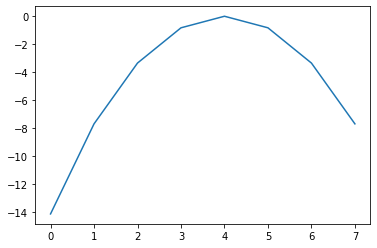

In [32]:
# if read other series
newbins = bins * 0.5
X = UF.genBhLobe(newbins)
plt.plot(20*np.log10(X)) # different setup 
# how to synthesise or sample from different frequencies

In [35]:
# how to apply - again in UF with genSpecSines_p

fs = 44100
Ns = 512

ipfreq = np.array([4000.0])
ipmag = np.array([0.0])
ipphase = np.array([0.0])

Y = UF.genSpecSines_p(ipfreq, ipmag, ipphase, Ns, fs)
Y

array([0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       0.00000000e+00+0.j, 0.00000000e+00+0.j, 0.00000000e+00+0.j,
       2.33831196e-05+0.j, 2.52694112e-03+0.j, 8.04807781e-02+

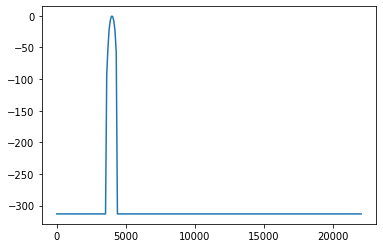

In [38]:
# get positive mag spectrum
absY = abs(Y[:Ns//2+1])

absY[absY < np.finfo(float).eps] = np.finfo(float).eps
freqaxis = fs * np.arange(Ns/2 + 1)/ float(Ns)

plt.plot(freqaxis, 20*np.log10(absY))

# see main lobe - see peak at 4000 hz

In [41]:
# how to generate time domain

from scipy.signal import blackmanharris, triang
from scipy.fftpack import ifft

y = np.real(ifft(Y))

# get y time

In [45]:
# re-apply and undo blackman harris window with triangular

sw = np.zeros(N) # sythesis window - traingular / BH

ow = triang(Ns/2)

hNs = Ns//2
H = Ns//4

sw[hNs - H: hNs + H] = ow

bh = blackmanharris(Ns)

bh = bh / sum(bh) # normalise

sw[hNs - H: hNs + H] = sw[hNs - H: hNs + H] / bh[hNs - H: hNs + H]

In [48]:
yw = np.zeros(Ns)

yw[:hNs -1] = y[hNs + 1:]
yw[hNs - 1:] = y[:hNs + 1]

yw *= sw # combine to get main output - mismatch in size



ValueError: operands could not be broadcast together with shapes (512,) (2048,) (512,) 

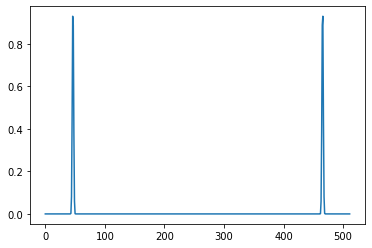

In [46]:
plt.plot(abs(Y)) # shows complex magnitude setup in linear 

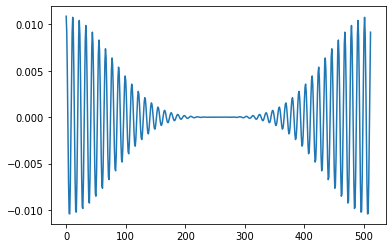

In [47]:
plt.plot(y) # 2nd half at beginning and 1st half at end 
# no zero paddding as M = N

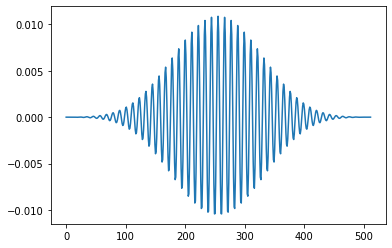

In [49]:
plt.plot(yw) # overall final output

In [ ]:
# finsl example 

# get oboe sound
# analyse
# get peaks
# interpolate
# get spec sines p
# return synthesised sound

# applies window undoing and normalising

# plots output of magnitude with crosses

# in results for oboe - parabolic interpolation is significant

SineModel

In [ ]:
# complete end-to-end model - with output to include (Ap, fp, pp)

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import get_window
import sys,os

# go to models
#sys.path.append(os.path.join(os.path.dirname(os.path.realpath(__file__)),'../software/models/'))
sys.path[0] = '/Users/MStamp/Documents/2021 Learning/Audio Processing for Music Applications/sms-tools-master/software/models/'
sys.path

In [50]:
# sineModel.py & sineModel_function.py

'sineModel' # function to do entire process but no tracking - for real-time

'sineModelAnal' # performs sinusoidal tracking - has tracking in place to process
# x, fs, w, N, H, t (threshold)
# additional for time varying aspect
# maxnSines, minSineDur, freqDevOffset (in Hz), freqDevSlope (deviation to increase as frequencies are higher)

from sineModel import sineModelAnal
# key part - while loop to interate over whole sound 
# applies dft, peak detection/interpolation - then applies into tracks

# after tracking - clean steps

In [51]:
from sineModel import sineTracking
# pfreq, pmag, pphase, tfreq (conitnuing incoming tracks)
# same freqDevOffset & freqDevSlope

# main part - cleaning up into usable info for looping over tracks
# can also create new tracks from 'non used peaks'

# returns - series of tracks

In [52]:
# final part - cleaning tracks
from sineModel import cleaningSineTracks

# loops through tracks, sees beginning and endings 
# if fragment below length set - then will delete

In [55]:
# test script
import sineModel as SM

inputFile = '/Users/MStamp/Documents/2021 Learning/Audio Processing for Music Applications/sms-tools-master/sounds/oboe-A4.wav'
window = 'hamming'
M = 501
N = 1024
t = -90
minSineDur = 0.1
maxnSines = 20
freqDevOffset = 10
freqDevSlope =0.001
H = 200

In [60]:
(fs, x) = UF.wavread(inputFile)
w = get_window(window, M)
tfreq, tmag, tphase = SM.sineModelAnal(x, fs, w,N, H,t, maxnSines, minSineDur, freqDevOffset, freqDevSlope)



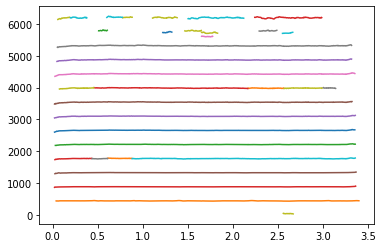

In [62]:
# show output of tracks

numFrames = int(tfreq[:,0].size)
frmTime = H*np.arange(numFrames)/float(fs)
tfreq[tfreq <=0] = np.nan
plt.plot(frmTime, tfreq)
plt.show()

# result - all tracks separated - lower has longer colours
# some serveral colours per line - so showed that dissapearance happened

# tracks correspond to harmonics mostly - whereas higher is likely tracking noise component/side-lobe

# to reduce noise - would need to increase to have more than 0.1 seconds

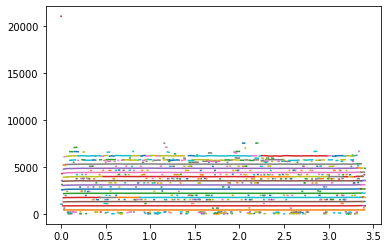

In [63]:
minSineDur = 0.001
(fs, x) = UF.wavread(inputFile)
w = get_window(window, M)
tfreq, tmag, tphase = SM.sineModelAnal(x, fs, w,N, H,t, maxnSines, minSineDur, freqDevOffset, freqDevSlope)
numFrames = int(tfreq[:,0].size)
frmTime = H*np.arange(numFrames)/float(fs)
tfreq[tfreq <=0] = np.nan
plt.plot(frmTime, tfreq)
plt.show()
# if less time, shows much more tracks of noise

In [65]:
minSineDur = 0.15
(fs, x) = UF.wavread(inputFile)
w = get_window(window, M)
tfreq, tmag, tphase = SM.sineModelAnal(x, fs, w,N, H,t, maxnSines, minSineDur, freqDevOffset, freqDevSlope)

# apply synthesis
# in sineModel_function.py
# main - calls analysis and function
op = SM.sineModelSynth(tfreq,tmag,tphase, N//2, H, fs)

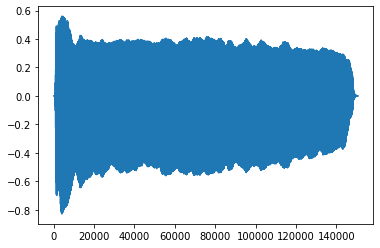

In [66]:
plt.plot(op) # see oboe sound

In [68]:
!pip install scikits.audiolab

     |████████████████████████████████| 892 kB 3.4 MB/s eta 0:00:01
    ERROR: Command errored out with exit status 1:
     command: /Users/MStamp/opt/anaconda3/bin/python -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/y9/gwmlyxfx29j5dzl0x6fc9ls00000gn/T/pip-install-_wp476mg/scikits.audiolab/setup.py'"'"'; __file__='"'"'/private/var/folders/y9/gwmlyxfx29j5dzl0x6fc9ls00000gn/T/pip-install-_wp476mg/scikits.audiolab/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/y9/gwmlyxfx29j5dzl0x6fc9ls00000gn/T/pip-install-_wp476mg/scikits.audiolab/pip-egg-info
         cwd: /private/var/folders/y9/gwmlyxfx29j5dzl0x6fc9ls00000gn/T/pip-install-_wp476mg/scikits.audiolab/
    Complete output (41 lines):
    SndfileInfo:
    customize UnixCCompiler
      libraries sndfile not found in /Users/MStamp/opt/anacond

In [67]:
import scikits.audiolab as al
al.play(op, fs)


ModuleNotFoundError: No module named 'scikits'

In [ ]:
# can try to play from GUI 
# sound output - quite similar to output in demo

In [1]:
def isPower2(num):
	"""
	Check if num is power of two
	"""
	return ((num & (num - 1)) == 0) and num > 0

In [3]:
isPower2(8)
isPower2(5)

False

In [8]:
(5 & 4) == 0

False

In [14]:
(7 & 6)

6

In [ ]:
# part 2 solution - similar to part 3 to run through results

In [ ]:
# run through solutions like before
windows = ['boxcar', 'hanning', 'hamming', 'blackman', 'blackmanharris']
dbs = np.arange(-120, -15, 5)

print(dbs)

#op = mainlobeTracker()
#print(abs(op[5]))
for window in windows:
    print(window)
    for db in dbs:
        print(db)
        op = mainlobeTracker()
        print(op[5])
        if (op[5][0] < 2) & (op[5][1] < 2):
            break

print(window)
print(db)